In [40]:
import numpy as np
from numpy import random as rd
import time
from solvers_listos import *
from funciones import *

In [41]:
%run politica_R.ipynb
%run politica_P.ipynb
# hay que ver qué onda este print

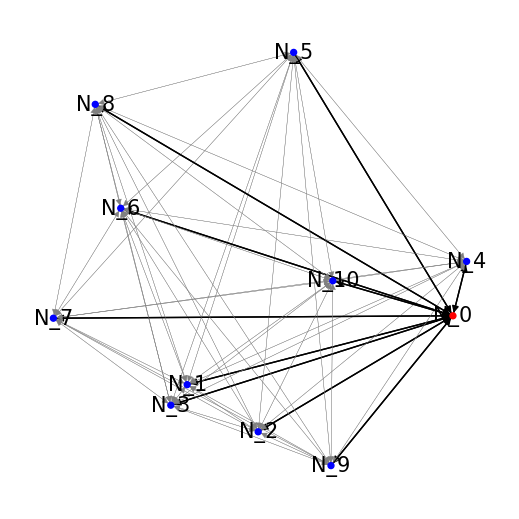

In [42]:
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'IRP1.xlsx' ,plot=True)
historia = simular_demanda_previa(G, dist = 'n', T=1000) 

In [91]:
rutas_R, perdidas_R, inventarios_R, costos_R, dems_R = simular_ejecucion_R(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte, T = 360)

Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Ruta 0:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 1:  ['N_0', 'N_9', 'N_2', 'N_6', 'N_0']
Ruta 2:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_7', 'N_0']
Ruta 3:  ['N_0', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 4:  ['N_0', 'N_4', 'N_9', 'N_1', 'N_6', 'N_0']
Ruta 5:  ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0']
Ruta 6:  ['N_0', 'N_4', 'N_1', 'N_3', 'N_6', 'N_8', 'N_0']
Ruta 7:  ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0']
Ruta 8:  ['N_0', 'N_4', 'N_9', 'N_7', 'N_6', 'N_5', 'N_0']
Ruta 9:  ['N_0', 'N_4', 'N_2', 'N_1', 'N_3', 'N_8', 'N_0']
Ruta 10:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_6', 'N_7', 'N_0']
Ruta 11:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_5', 'N_0']
Ruta 12:  ['N_0', 'N_4', 'N_10', 'N_3', 'N_8', 'N_0']
Ruta 13:  ['N_0', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0']
Ruta 14:  ['N_0', 'N_4', 'N_1

In [92]:
rutas_P, perdidas_P, inventarios_P, costos_P, dems_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 360, F = 5, cap = 871)

Tiempo: 0 | Ruta: ['N_0', 'N_8', 'N_7', 'N_6', 'N_3', 'N_4', 'N_0'] | costo_SO: 327.9021859537082 | costo_r: 1248.5024668073445
Tiempo: 1 | Ruta: ['N_0', 'N_8', 'N_7', 'N_4', 'N_0'] | costo_SO: 408.08981646366175 | costo_r: 1069.5083556983338
Tiempo: 2 | Ruta: ['N_0', 'N_7', 'N_1', 'N_10', 'N_8', 'N_3', 'N_0'] | costo_SO: 315.49805417660036 | costo_r: 1339.134029492767
Tiempo: 3 | Ruta: ['N_0', 'N_8', 'N_7', 'N_1', 'N_3', 'N_5', 'N_0'] | costo_SO: 231.0930361658978 | costo_r: 1116.4901412142242
Tiempo: 4 | Ruta: ['N_0', 'N_6', 'N_2', 'N_9', 'N_10', 'N_0'] | costo_SO: 154.28415692565363 | costo_r: 852.2667487052644
Tiempo: 5 | Ruta: ['N_0', 'N_1', 'N_2', 'N_0'] | costo_SO: 304.11331826446366 | costo_r: 384.7179954440151
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_1', 'N_7', 'N_6', 'N_3', 'N_8', 'N_0'] | costo_SO: 215.1531074635825 | costo_r: 1079.6758975295284
Tiempo: 7 | Ruta: ['N_0', 'N_9', 'N_4', 'N_5', 'N_0'] | costo_SO: 169.06709332557307 | costo_r: 664.8358596158091
Tiempo: 8 | Ruta: ['N_

In [93]:
insatisf_R = []
insatisf_P = []

for dia in range(len(dems_P)):
    insatisf_R.append(costos_R[0][dia]/sum(dems_P[dia].values()))
    insatisf_P.append(costos_P[0][dia]/sum(dems_P[dia].values()))

len(insatisf_P)


360

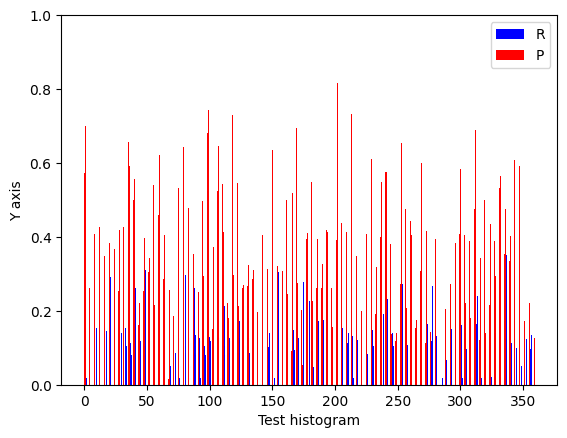

In [104]:
import numpy as np
import matplotlib.pyplot as plt

#The data
womenMeans = (25, 32, 34, 20, 25)
menMeans = (20, 35, 30, 35, 27)
indices = [5.5,6,7,8.5,8.9]
#Calculate optimal width
# width = np.min(np.diff(indices))/3
width = 1/3
x_R = [x-width for x in range(len(insatisf_R))]
fig = plt.figure()
ax = fig.add_subplot(111)
# matplotlib 3.0 you have to use align
# ax.bar(indices-width,womenMeans,width,color='b',label='-Ymin',align='edge')
# ax.bar(indices,menMeans,width,color='r',label='Ymax',align='edge')

ax.bar(x_R, insatisf_R, width, color = 'b', label = 'R', align='edge')
ax.bar(range(len(insatisf_P)), insatisf_P,width, color = 'r', label = 'P', align='edge')

ax.set_xlabel('Test histogram')
ax.set_ylabel('Y axis')
plt.ylim(0,1)
plt.legend()
plt.show()

(0.0, 1000.0)

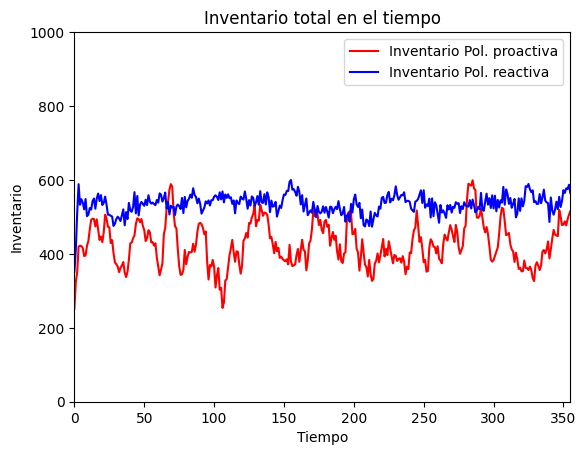

In [95]:
plt.plot(smooth(inventarios_P, 7), color = 'red')
plt.plot(smooth(inventarios_R, 7), color = 'blue')
plt.xlabel('Tiempo')
plt.ylabel('Inventario')
plt.title('Inventario total en el tiempo')
plt.legend(['Inventario Pol. proactiva', 'Inventario Pol. reactiva'])
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,1000)

In [96]:
# for i in range(60):
#     print(costos_R[0][i], costos_R[1][i])

costo_total_P = [costos_P[0][i] + costos_P[1][i] for i in range(len(costos_P[0]))]
costo_total_R = [costos_R[0][i] + costos_R[1][i] for i in range(len(costos_R[0]))]

(0.0, 2000.0)

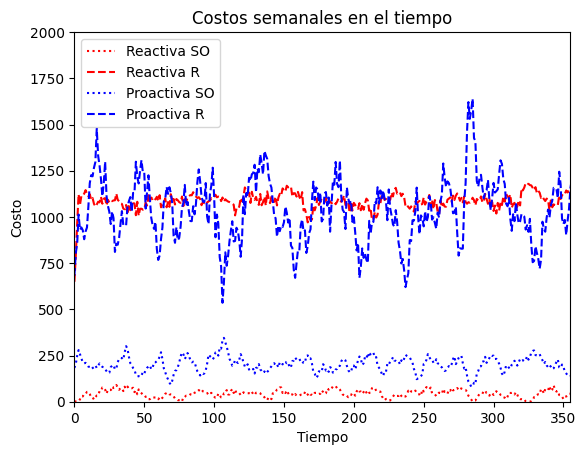

In [97]:
# plt.plot(smooth(inventarios_P, 7), color = 'red')
# plt.plot(smooth(inventarios_R, 7), color = 'blue')


plt.plot(smooth(costos_R[0], 7), color = 'red', linestyle = 'dotted', label = 'Reactiva SO')
plt.plot(smooth(costos_R[1], 7), color = 'red', linestyle = '--', label = 'Reactiva R')

plt.plot(smooth(costos_P[0], 7), color = 'blue', linestyle = 'dotted', label = 'Proactiva SO')
plt.plot(smooth(costos_P[1], 7), color = 'blue', linestyle = '--', label = 'Proactiva R')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
plt.ylim(0,2000)

(0.0, 355.0)

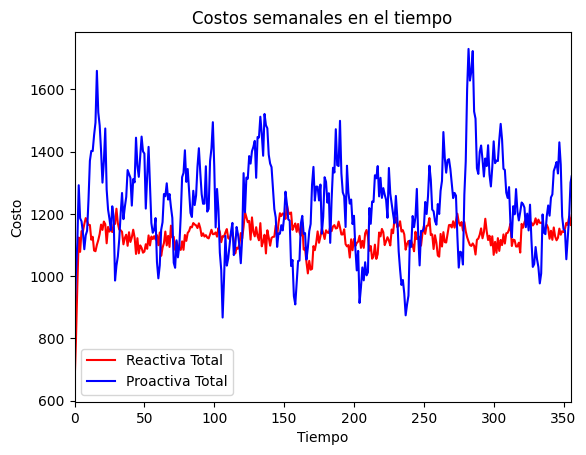

In [98]:
plt.plot(smooth(costo_total_R, 7), color = 'red', label = 'Reactiva Total')
plt.plot(smooth(costo_total_P, 7), color = 'blue', label = 'Proactiva Total')

plt.xlabel('Tiempo')
plt.ylabel('Costo')
plt.title('Costos semanales en el tiempo')
plt.legend()
plt.xlim(0,len(inventarios_P)-5)
# plt.ylim(0,2000)

In [99]:
#cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
#cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

#print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
#print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

In [100]:
#datos = dispersion_intervalos(df)
        
#df_nodos['mean'] = datos['mean']
#df_nodos['std'] = datos['std']
#df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
#df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
#df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
#df_nodos

In [101]:
#df_nodos_corr.corr()

In [102]:
n_s = [10,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R(grafo_inicial = G, T = 365, dem_historico = historia, capacidad = cap_tpte)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')



        

Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Ruta 0:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 1:  ['N_0', 'N_4', 'N_9', 'N_6', 'N_0']
Ruta 2:  ['N_0', 'N_4', 'N_10', 'N_2', 'N_1', 'N_6', 'N_0']
Ruta 3:  ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 4:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0']
Ruta 5:  ['N_0', 'N_4', 'N_5', 'N_8', 'N_6', 'N_3', 'N_1', 'N_2', 'N_0']
Ruta 6:  ['N_0', 'N_4', 'N_9', 'N_1', 'N_7', 'N_0']
Ruta 7:  ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_5', 'N_0']
Ruta 8:  ['N_0', 'N_4', 'N_2', 'N_8', 'N_0']
Ruta 9:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0']
Ruta 10:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_0']
Ruta 11:  ['N_0', 'N_9', 'N_6', 'N_8', 'N_0']
Ruta 12:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_5', 'N_0']
Ruta 13:  ['N_0', 'N_10', 'N_9', 'N_1', 'N_6', '

ValueError: too many values to unpack (expected 3)

In [ ]:
datos_R

{'n10empty': {'rutas': {0: ['N_0',
    'N_4',
    'N_10',
    'N_9',
    'N_2',
    'N_1',
    'N_3',
    'N_7',
    'N_6',
    'N_8',
    'N_5',
    'N_0'],
   1: ['N_0', 'N_2', 'N_0'],
   2: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_3', 'N_6', 'N_0'],
   3: ['N_0', 'N_9', 'N_2', 'N_1', 'N_7', 'N_8', 'N_5', 'N_0'],
   4: ['N_0', 'N_4', 'N_10', 'N_1', 'N_3', 'N_6', 'N_0'],
   5: ['N_0', 'N_9', 'N_2', 'N_5', 'N_0'],
   6: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_7', 'N_6', 'N_8', 'N_0'],
   7: ['N_0', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_5', 'N_0'],
   8: ['N_0', 'N_4', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0'],
   9: ['N_0', 'N_9', 'N_2', 'N_10', 'N_8', 'N_0'],
   10: ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_6', 'N_5', 'N_0'],
   11: ['N_0', 'N_10', 'N_9', 'N_2', 'N_6', 'N_7', 'N_0'],
   12: ['N_0', 'N_4', 'N_1', 'N_3', 'N_8', 'N_0'],
   13: ['N_0', 'N_9', 'N_2', 'N_7', 'N_6', 'N_5', 'N_0'],
   14: ['N_0', 'N_4', 'N_10', 'N_9', 'N_1', 'N_6', 'N_0'],
   15: ['N_0', 'N_4', 'N_9', 'N_2', 'N_3', 'N_7

Tiempo: 0 | Ruta: ['N_0', 'N_8', 'N_3', 'N_7', 'N_1', 'N_5', 'N_0'] | costo_SO: 298997.9049398236 | costo_r: 1296.210892493124
Tiempo: 1 | Ruta: ['N_0', 'N_6', 'N_3', 'N_8', 'N_9', 'N_4', 'N_0'] | costo_SO: 93424.48020503235 | costo_r: 1431.0744343348274
Tiempo: 2 | Ruta: ['N_0', 'N_5', 'N_3', 'N_9', 'N_1', 'N_7', 'N_0'] | costo_SO: 98059.02372351156 | costo_r: 1112.7839518621486
Tiempo: 3 | Ruta: ['N_0', 'N_10', 'N_0'] | costo_SO: 143179.20679259193 | costo_r: 135.14806694880988
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_10', 'N_6', 'N_5', 'N_0'] | costo_SO: 234201.4174999988 | costo_r: 665.5577671558542
Tiempo: 5 | Ruta: ['N_0', 'N_4', 'N_10', 'N_2', 'N_0'] | costo_SO: 277867.14660745405 | costo_r: 344.79816878492
Tiempo: 6 | Ruta: ['N_0', 'N_2', 'N_9', 'N_1', 'N_4', 'N_0'] | costo_SO: 199594.13668276655 | costo_r: 814.4247738205909
Tiempo: 7 | Ruta: ['N_0', 'N_2', 'N_1', 'N_5', 'N_8', 'N_4', 'N_0'] | costo_SO: 231248.92561166012 | costo_r: 1271.0180902213422
Tiempo: 8 | Ruta: ['N_0', 'N_9'

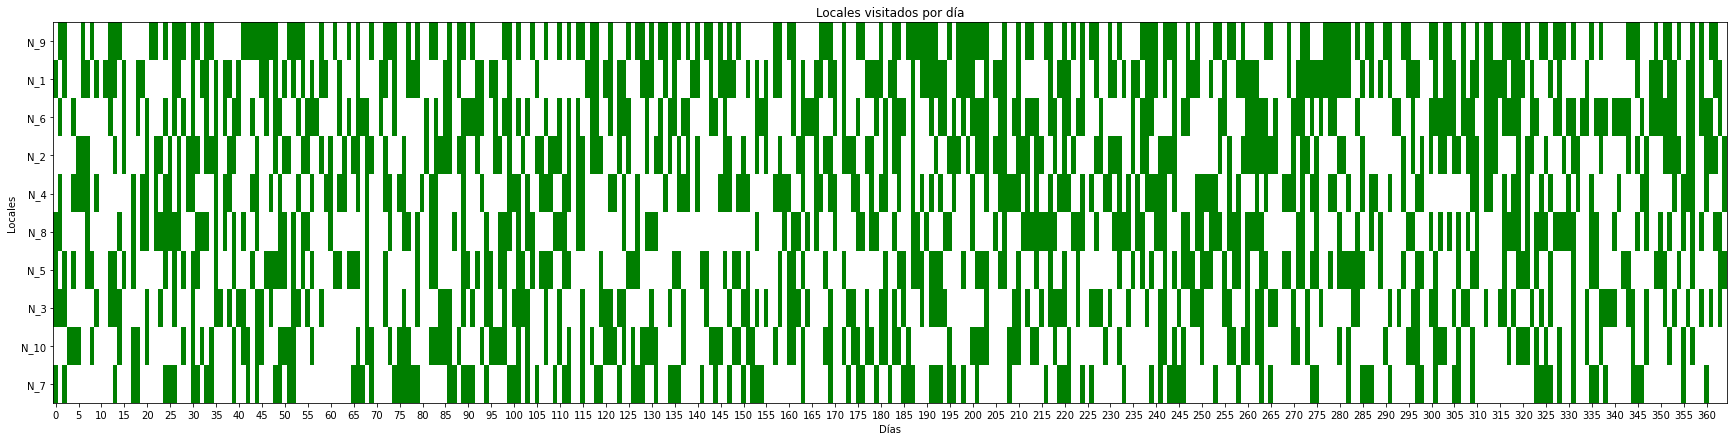

Listo n10empty.xlsx
Tiempo: 0 | Ruta: [] | costo_SO: 251392.13716977954 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_2', 'N_5', 'N_8', 'N_0'] | costo_SO: 426989.36633456056 | costo_r: 773.1594358985684
Tiempo: 2 | Ruta: ['N_0', 'N_2', 'N_9', 'N_5', 'N_0'] | costo_SO: 371140.9165104095 | costo_r: 663.7536861809233
Tiempo: 3 | Ruta: ['N_0', 'N_2', 'N_1', 'N_6', 'N_7', 'N_9', 'N_5', 'N_8', 'N_10', 'N_0'] | costo_SO: 59990.09813037484 | costo_r: 1796.480665437855
Tiempo: 4 | Ruta: ['N_0', 'N_9', 'N_4', 'N_0'] | costo_SO: 199196.8490808773 | costo_r: 407.8747730676704
Tiempo: 5 | Ruta: ['N_0', 'N_8', 'N_1', 'N_4', 'N_9', 'N_10', 'N_0'] | costo_SO: 169739.19203511594 | costo_r: 1385.0523658659165
Tiempo: 6 | Ruta: ['N_0', 'N_8', 'N_9', 'N_2', 'N_1', 'N_5', 'N_0'] | costo_SO: 166649.71008550242 | costo_r: 1296.5999472034491
Tiempo: 7 | Ruta: ['N_0', 'N_1', 'N_5', 'N_7', 'N_9', 'N_0'] | costo_SO: 141853.71582743467 | costo_r: 1268.5118629351232
Tiempo: 8 | Ruta: ['N_0', 'N_6', 'N_7', 'N_0'] | cos

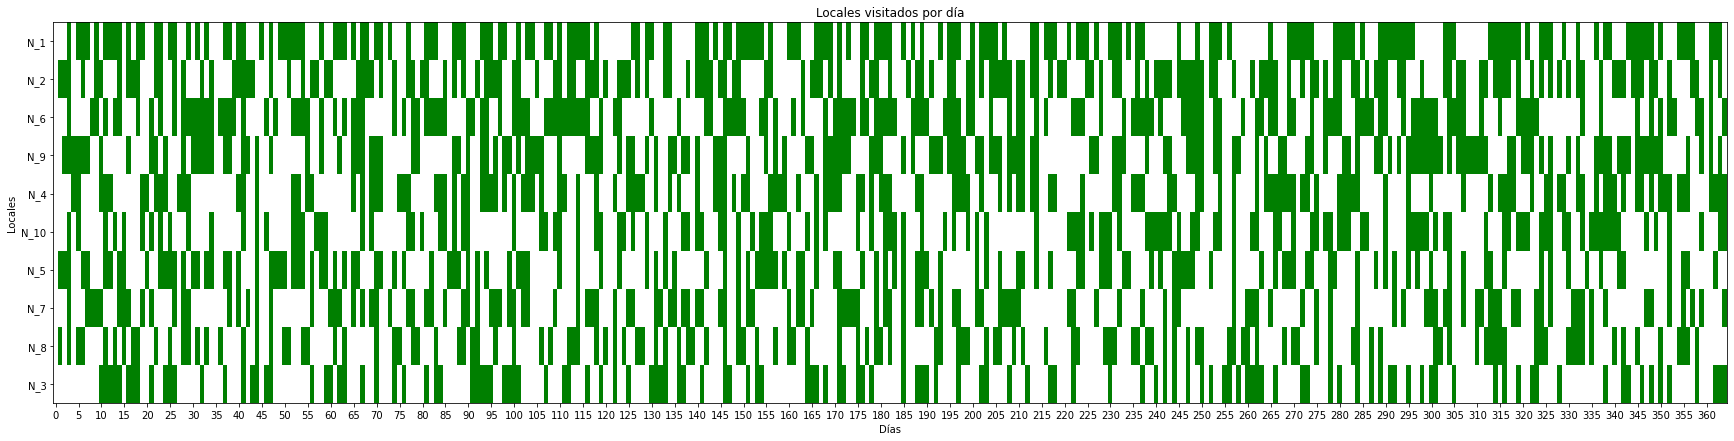

Listo n10estandar.xlsx
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_9', 'N_8', 'N_10', 'N_2', 'N_0'] | costo_SO: 71854.33185894704 | costo_r: 1026.704606300666
Tiempo: 2 | Ruta: ['N_0', 'N_1', 'N_2', 'N_5', 'N_6', 'N_9', 'N_8', 'N_0'] | costo_SO: 148055.19679632835 | costo_r: 1640.5761497141357
Tiempo: 3 | Ruta: ['N_0', 'N_9', 'N_4', 'N_7', 'N_6', 'N_2', 'N_0'] | costo_SO: 164899.30901413062 | costo_r: 1220.3925196791558
Tiempo: 4 | Ruta: ['N_0', 'N_7', 'N_10', 'N_2', 'N_0'] | costo_SO: 82278.15609039928 | costo_r: 897.0615522029431
Tiempo: 5 | Ruta: ['N_0', 'N_9', 'N_6', 'N_0'] | costo_SO: 288032.1735822265 | costo_r: 496.783837661451
Tiempo: 6 | Ruta: ['N_0', 'N_8', 'N_7', 'N_9', 'N_3', 'N_2', 'N_6', 'N_0'] | costo_SO: 279802.70652711595 | costo_r: 1461.8313011175069
Tiempo: 7 | Ruta: ['N_0', 'N_6', 'N_3', 'N_8', 'N_5', 'N_0'] | costo_SO: 308723.2296158281 | costo_r: 1032.392497581102
Tiempo: 8 | Ruta: ['N_0', 'N_1', 'N_3', 'N_9', 'N_0'] | costo_SO: 14

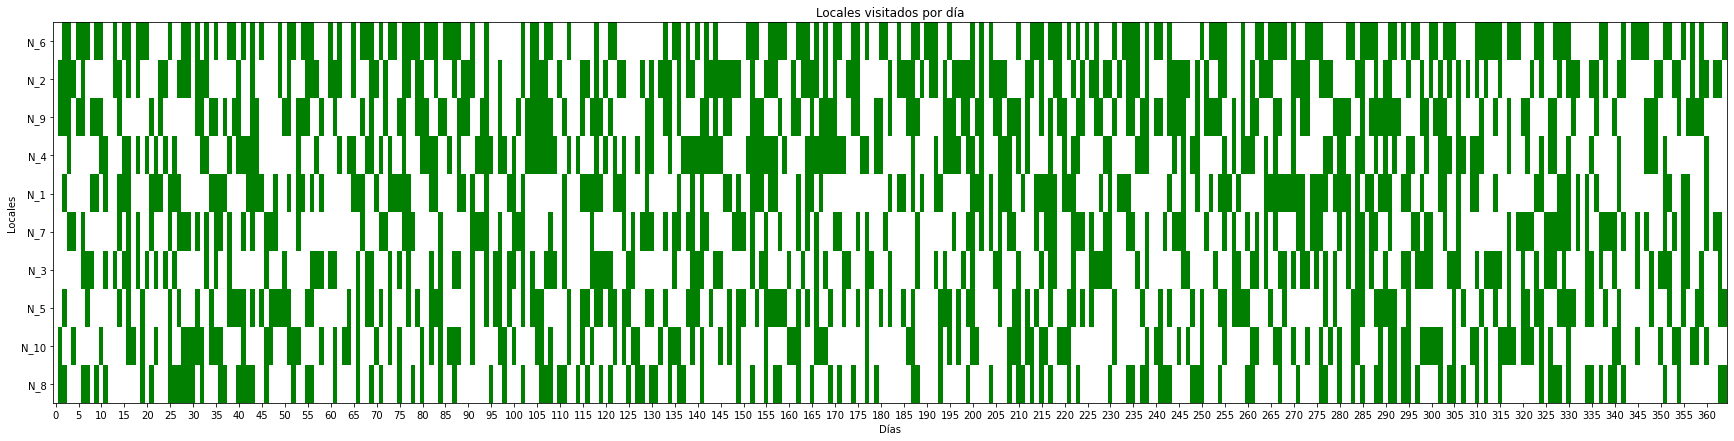

Listo n10full.xlsx
Tiempo: 0 | Ruta: ['N_0', 'N_6', 'N_19', 'N_9', 'N_11', 'N_8', 'N_20', 'N_12', 'N_2', 'N_14', 'N_7', 'N_18', 'N_15', 'N_10', 'N_4', 'N_5', 'N_0'] | costo_SO: 296247.66300911456 | costo_r: 3111.7634707677134
Tiempo: 1 | Ruta: ['N_0', 'N_10', 'N_19', 'N_11', 'N_14', 'N_6', 'N_18', 'N_8', 'N_0'] | costo_SO: 308147.9337291206 | costo_r: 1661.1646511349516
Tiempo: 2 | Ruta: ['N_0', 'N_15', 'N_1', 'N_16', 'N_5', 'N_17', 'N_4', 'N_0'] | costo_SO: 443099.53097360564 | costo_r: 1880.1194327991116
Tiempo: 3 | Ruta: ['N_0', 'N_10', 'N_15', 'N_11', 'N_4', 'N_17', 'N_8', 'N_7', 'N_12', 'N_9', 'N_6', 'N_0'] | costo_SO: 455555.33335682354 | costo_r: 1992.3090409792119
Tiempo: 4 | Ruta: ['N_0', 'N_7', 'N_2', 'N_5', 'N_10', 'N_18', 'N_3', 'N_0'] | costo_SO: 395848.10735349444 | costo_r: 2011.6102897409357
Tiempo: 5 | Ruta: ['N_0', 'N_5', 'N_20', 'N_15', 'N_10', 'N_13', 'N_1', 'N_0'] | costo_SO: 574203.6461042946 | costo_r: 1516.529180059283
Tiempo: 6 | Ruta: ['N_0', 'N_13', 'N_6', 'N

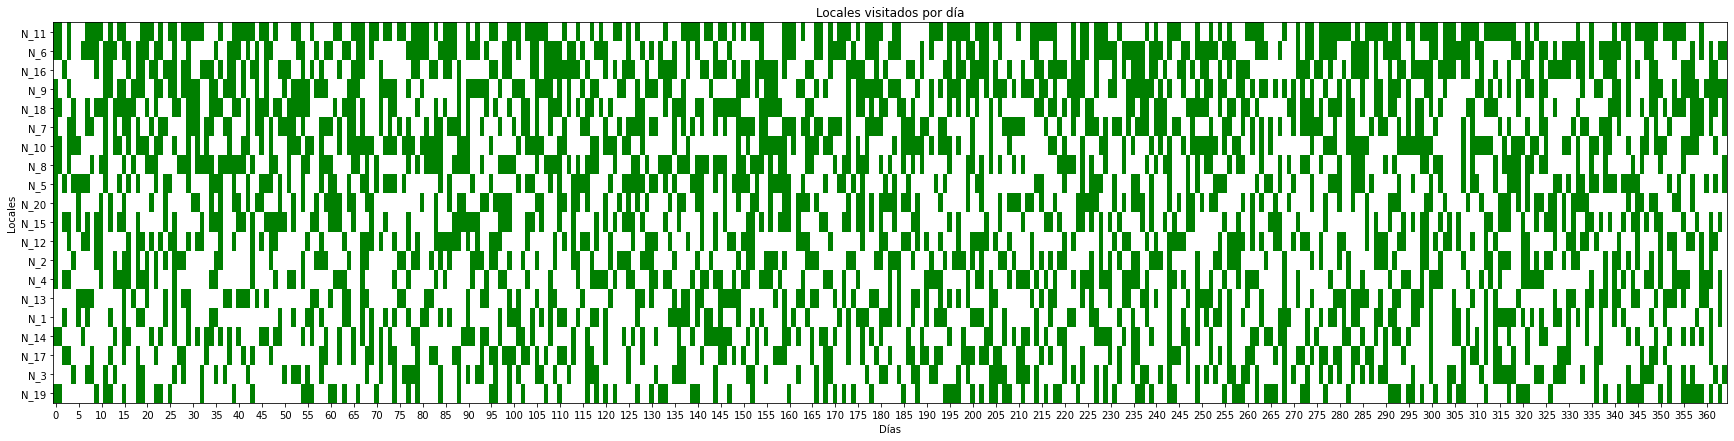

Listo n20empty.xlsx
Tiempo: 0 | Ruta: [] | costo_SO: 176928.15409747895 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_13', 'N_11', 'N_6', 'N_8', 'N_2', 'N_4', 'N_18', 'N_5', 'N_17', 'N_9', 'N_7', 'N_0'] | costo_SO: 262557.12562573195 | costo_r: 2482.421191728811
Tiempo: 2 | Ruta: ['N_0', 'N_3', 'N_15', 'N_7', 'N_1', 'N_4', 'N_14', 'N_17', 'N_0'] | costo_SO: 500044.99254902056 | costo_r: 2003.621080347402
Tiempo: 3 | Ruta: ['N_0', 'N_12', 'N_13', 'N_16', 'N_20', 'N_7', 'N_18', 'N_9', 'N_8', 'N_2', 'N_10', 'N_5', 'N_0'] | costo_SO: 215699.34509941618 | costo_r: 3015.3254271691
Tiempo: 4 | Ruta: ['N_0', 'N_14', 'N_18', 'N_15', 'N_7', 'N_5', 'N_3', 'N_1', 'N_12', 'N_16', 'N_4', 'N_13', 'N_6', 'N_0'] | costo_SO: 260523.77824208894 | costo_r: 3265.192870587908
Tiempo: 5 | Ruta: ['N_0', 'N_9', 'N_17', 'N_14', 'N_8', 'N_7', 'N_11', 'N_13', 'N_4', 'N_0'] | costo_SO: 381107.3720106117 | costo_r: 2035.8113610209407
Tiempo: 6 | Ruta: ['N_0', 'N_11', 'N_16', 'N_12', 'N_2', 'N_6', 'N_13', 'N_1', 'N_0'] 

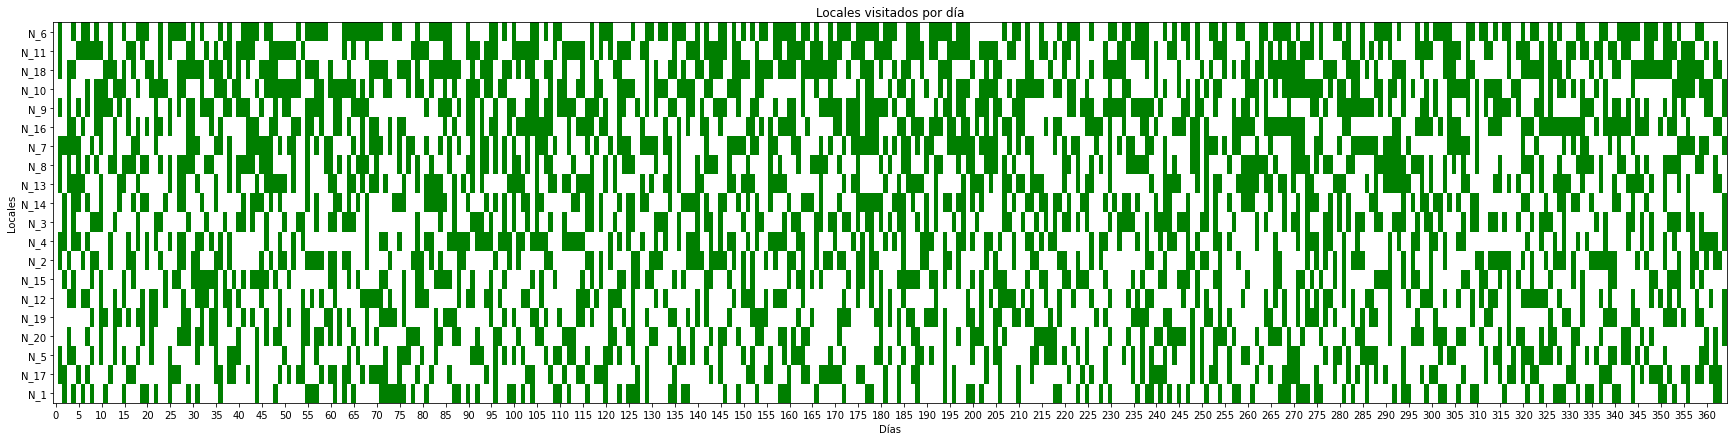

Listo n20estandar.xlsx
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_13', 'N_20', 'N_4', 'N_16', 'N_0'] | costo_SO: 71262.10678690688 | costo_r: 711.8703470769944
Tiempo: 2 | Ruta: ['N_0', 'N_8', 'N_7', 'N_13', 'N_10', 'N_1', 'N_15', 'N_2', 'N_16', 'N_6', 'N_18', 'N_0'] | costo_SO: 330393.346005021 | costo_r: 3400.861827800573
Tiempo: 3 | Ruta: ['N_0', 'N_10', 'N_6', 'N_5', 'N_7', 'N_16', 'N_19', 'N_13', 'N_12', 'N_17', 'N_1', 'N_0'] | costo_SO: 316493.87491771247 | costo_r: 2278.533987625922
Tiempo: 4 | Ruta: ['N_0', 'N_9', 'N_3', 'N_1', 'N_16', 'N_18', 'N_10', 'N_20', 'N_15', 'N_7', 'N_6', 'N_0'] | costo_SO: 232579.47158217392 | costo_r: 2253.631657256414
Tiempo: 5 | Ruta: ['N_0', 'N_6', 'N_11', 'N_8', 'N_16', 'N_14', 'N_0'] | costo_SO: 498606.48650161707 | costo_r: 702.7777868082277
Tiempo: 6 | Ruta: ['N_0', 'N_10', 'N_2', 'N_5', 'N_14', 'N_3', 'N_0'] | costo_SO: 559144.6412547816 | costo_r: 1654.7035285899083
Tiempo: 7 | Ruta: ['N_0', 'N_11', 'N_16', 

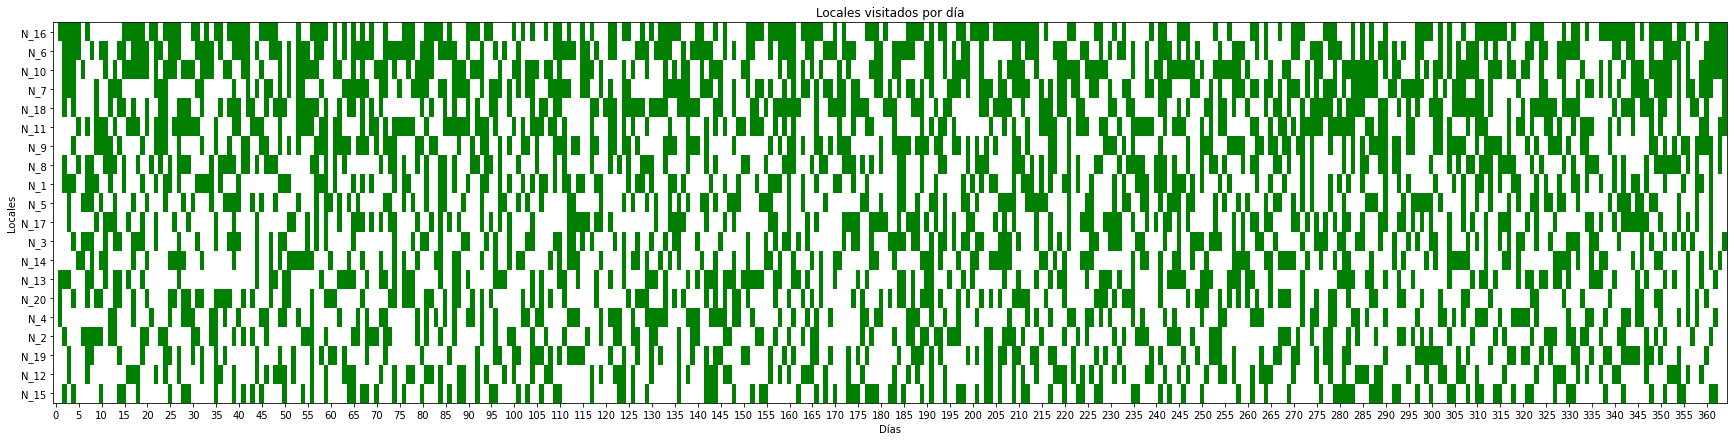

Listo n20full.xlsx
Tiempo: 0 | Ruta: ['N_0', 'N_24', 'N_13', 'N_20', 'N_3', 'N_11', 'N_28', 'N_30', 'N_6', 'N_1', 'N_17', 'N_25', 'N_8', 'N_19', 'N_27', 'N_21', 'N_2', 'N_15', 'N_5', 'N_22', 'N_18', 'N_14', 'N_26', 'N_16', 'N_0'] | costo_SO: 414778.4038474432 | costo_r: 4301.984264172715
Tiempo: 1 | Ruta: ['N_0', 'N_7', 'N_4', 'N_9', 'N_28', 'N_8', 'N_6', 'N_25', 'N_0'] | costo_SO: 390088.35475589015 | costo_r: 1673.578002700673
Tiempo: 2 | Ruta: ['N_0', 'N_28', 'N_2', 'N_9', 'N_11', 'N_3', 'N_4', 'N_12', 'N_27', 'N_5', 'N_14', 'N_8', 'N_19', 'N_25', 'N_16', 'N_18', 'N_1', 'N_0'] | costo_SO: 434373.26800999924 | costo_r: 2780.062148657344
Tiempo: 3 | Ruta: ['N_0', 'N_20', 'N_26', 'N_4', 'N_28', 'N_30', 'N_15', 'N_17', 'N_18', 'N_29', 'N_19', 'N_2', 'N_1', 'N_21', 'N_11', 'N_16', 'N_8', 'N_0'] | costo_SO: 319930.60081417346 | costo_r: 3356.595199661369
Tiempo: 4 | Ruta: ['N_0', 'N_2', 'N_28', 'N_3', 'N_30', 'N_6', 'N_25', 'N_14', 'N_8', 'N_20', 'N_16', 'N_24', 'N_0'] | costo_SO: 391764.

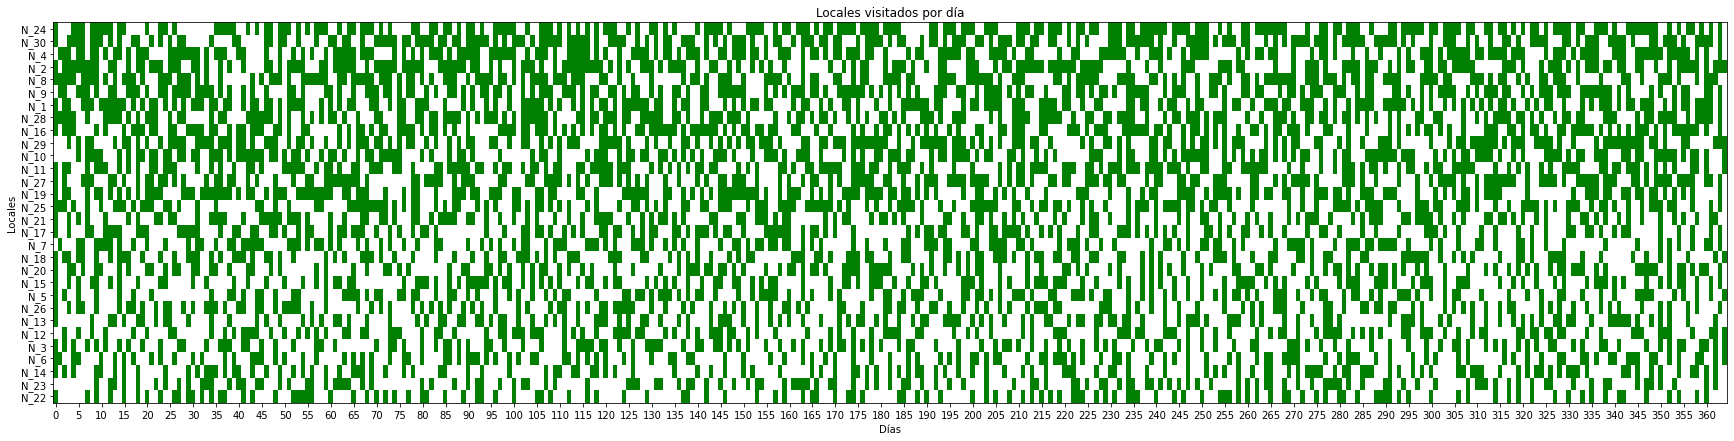

Listo n30empty.xlsx
Tiempo: 0 | Ruta: [] | costo_SO: 418255.63056052977 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_28', 'N_18', 'N_6', 'N_20', 'N_5', 'N_7', 'N_25', 'N_10', 'N_12', 'N_23', 'N_15', 'N_27', 'N_24', 'N_1', 'N_0'] | costo_SO: 536656.919609851 | costo_r: 2528.725698643505
Tiempo: 2 | Ruta: ['N_0', 'N_11', 'N_15', 'N_13', 'N_25', 'N_29', 'N_17', 'N_14', 'N_16', 'N_1', 'N_30', 'N_24', 'N_12', 'N_4', 'N_28', 'N_3', 'N_26', 'N_19', 'N_22', 'N_0'] | costo_SO: 165346.3091968645 | costo_r: 4321.0192765110205
Tiempo: 3 | Ruta: ['N_0', 'N_5', 'N_14', 'N_21', 'N_8', 'N_29', 'N_20', 'N_27', 'N_9', 'N_24', 'N_6', 'N_23', 'N_19', 'N_12', 'N_18', 'N_3', 'N_0'] | costo_SO: 261596.9114268644 | costo_r: 2986.6300548759605
Tiempo: 4 | Ruta: ['N_0', 'N_24', 'N_28', 'N_8', 'N_17', 'N_9', 'N_2', 'N_19', 'N_25', 'N_11', 'N_30', 'N_16', 'N_0'] | costo_SO: 415089.1531561524 | costo_r: 1846.899488304609
Tiempo: 5 | Ruta: ['N_0', 'N_1', 'N_5', 'N_11', 'N_4', 'N_25', 'N_30', 'N_29', 'N_8', 'N_9', 'N_7

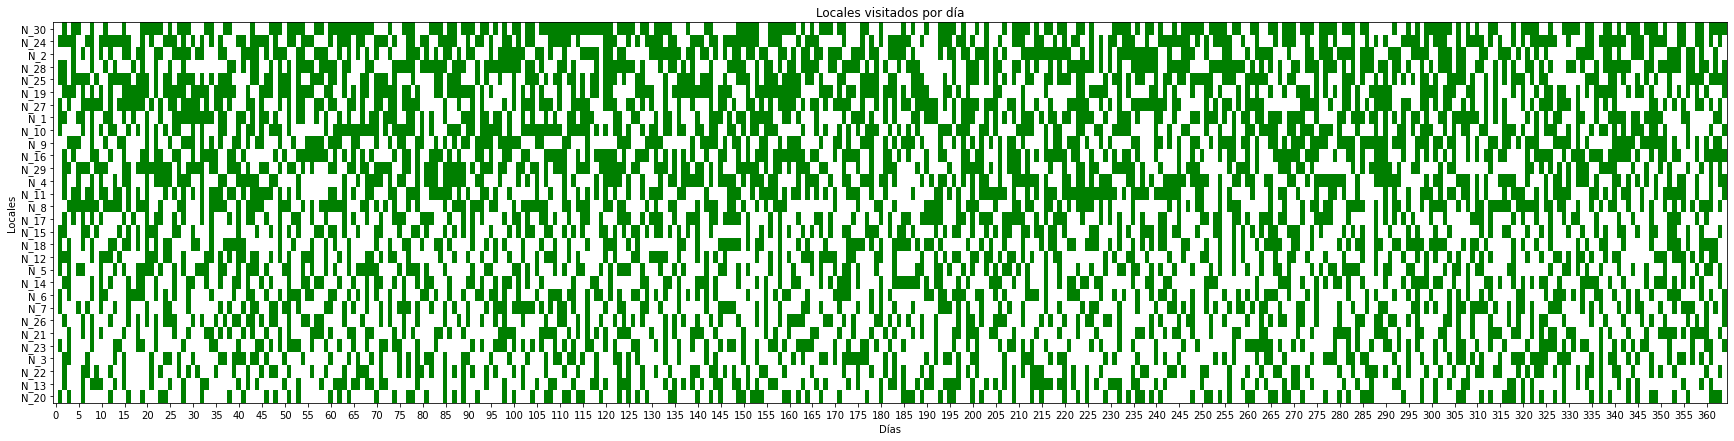

Listo n30estandar.xlsx
Tiempo: 0 | Ruta: [] | costo_SO: 0 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_24', 'N_1', 'N_11', 'N_28', 'N_19', 'N_4', 'N_3', 'N_27', 'N_0'] | costo_SO: 196524.46700382576 | costo_r: 1256.8556637453878
Tiempo: 2 | Ruta: ['N_0', 'N_28', 'N_30', 'N_15', 'N_10', 'N_17', 'N_27', 'N_13', 'N_16', 'N_5', 'N_19', 'N_24', 'N_11', 'N_12', 'N_7', 'N_0'] | costo_SO: 566080.754055963 | costo_r: 2453.934540306075
Tiempo: 3 | Ruta: ['N_0', 'N_26', 'N_15', 'N_9', 'N_2', 'N_6', 'N_10', 'N_4', 'N_8', 'N_1', 'N_28', 'N_23', 'N_22', 'N_18', 'N_0'] | costo_SO: 456244.5805627696 | costo_r: 3255.282300129019
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_1', 'N_20', 'N_8', 'N_6', 'N_5', 'N_15', 'N_2', 'N_27', 'N_17', 'N_11', 'N_22', 'N_25', 'N_19', 'N_29', 'N_0'] | costo_SO: 486941.94017866586 | costo_r: 3333.5522137745534
Tiempo: 5 | Ruta: ['N_0', 'N_29', 'N_11', 'N_30', 'N_7', 'N_17', 'N_6', 'N_8', 'N_18', 'N_2', 'N_15', 'N_10', 'N_28', 'N_23', 'N_26', 'N_0'] | costo_SO: 541662.8628637529 | co

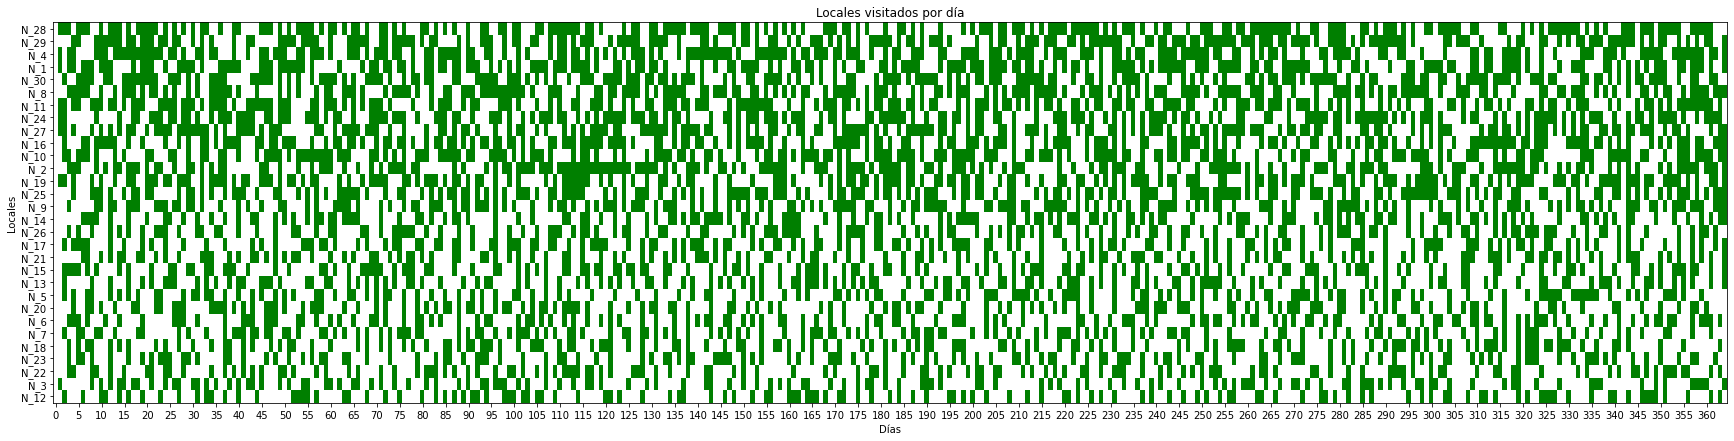

Listo n30full.xlsx


In [ ]:
datos_P = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_PRO_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_P, perdidas_P, inventarios_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 365, F = 5, cap = cap_tpte)
        datos_P[f'n{n}{i}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P}
        N = len(G.nodes())-1
        df = generar_df(rutas_P, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')


In [ ]:
list(datos_P.keys())

['n10empty',
 'n10estandar',
 'n10full',
 'n20empty',
 'n20estandar',
 'n20full',
 'n30empty',
 'n30estandar',
 'n30full']

In [ ]:
inventarios_P = {k: datos_P[k]['inventarios'] for k in list(datos_P.keys())}
inventarios_R = {k: datos_R[k]['inventarios'] for k in list(datos_R.keys())}

{'n10empty': [467.6227608955743,
  443.9741463870609,
  555.6009453556119,
  283.8832870720157,
  393.19798139360756,
  288.7343950011897,
  305.51643299402735,
  417.1257684722348,
  408.348788287636,
  317.7257312316807,
  28.75934674037084,
  94.3773225468608,
  396.48792504892,
  497.4993251635125,
  455.6082885322621,
  473.4969455939355,
  112.16468226957092,
  571.164976754666,
  559.516711483526,
  375.04576746593494,
  389.5103839130025,
  195.39968914128562,
  248.6476403080713,
  135.2905843022732,
  607.6933021197739,
  403.51742870622866,
  653.2279184066535,
  488.1856949364631,
  477.5291023603562,
  244.53049557562838,
  749.519751944909,
  582.9097757934271,
  450.34499257899597,
  577.5051418350143,
  447.0382441873528,
  648.254201467053,
  157.81497461849193,
  305.26709632954845,
  221.23562135004227,
  606.8162464268677,
  428.305732034371,
  320.4610495971316,
  423.65766736860314,
  501.8542973178189,
  605.5080382976107,
  406.5805062549987,
  446.9861946644496